<a href="https://colab.research.google.com/github/Boris2232/Machine-Learning-Project/blob/main/Utk_dataset%2BRaf_db(creating%20new%20big%20dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# In this section we will merge two datasets to have better results in the future.
# RAf Db dataset is small, so combining it with UTK will help reduce overfitting (more data => less overfitting)

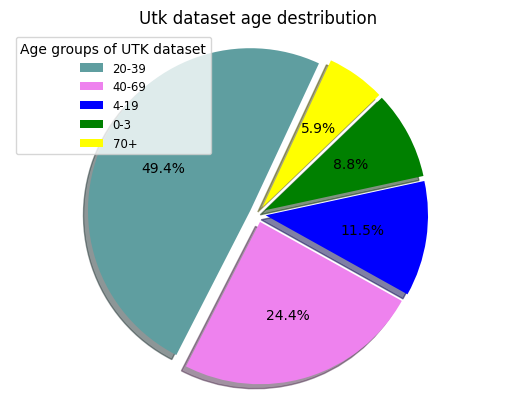

In [3]:
colors = ['cadetblue', 'violet', 'blue', 'green', 'yellow','cyan','magenta','maroon','coral']
df=pd.read_csv('UTK_faces.csv',delimiter=';')

# np.where is a fast function which allows to set conditions.
df['age_range'] = np.where(
    (df['age'] >= 0) & (df['age'] <= 3), '0-3', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 4) & (df['age'] <= 19), '4-19', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 20) & (df['age'] <= 39), '20-39', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 40) & (df['age'] <= 69), '40-69', df['age_range'])
df['age_range'] = np.where(
    (df['age'] >= 70), '70+', df['age_range'])
list1 = ['gender', 'race', 'split', 'emotion']
# removing unused columns.
for i in list1:
    del df[i]
with open('UTK_faces_with age_rande.csv', 'wt') as file:
    df.to_csv(file, index=False)
x = df['age_range'].value_counts()
labels = list(x.index)
counter = list(x.values)
explode = [0.05 for i in range(len(labels))]
plt.pie(counter, shadow=True, autopct='%1.1f%%', colors=colors, explode=explode, startangle=65)
plt.axis('equal')
plt.legend(loc='upper left', title='Age groups of UTK dataset', fontsize='small',labels=labels)
plt.title("Utk dataset age destribution")
plt.show()

# Now we can see that 20-39 is the biggest age group. 70+ is estimated to cause some problems because this dataset is really small.

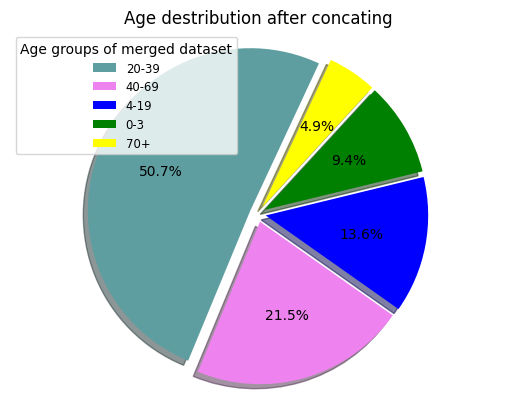

In [6]:
# age distribution after data merge
# here we will include only training dataset, dictribution of full dataset is shown in my github page.
# python.pandas library is one of the most comfortable to use. It gives lots of tools to handle csv files and fastly write them to different folders.
# In future project i decided to use pytorch framework, since it is fast and allows to create custom CNN models.
df = pd.read_csv('UTK_faces_with age_rande.csv', delimiter=',')
df_raf=pd.read_csv('RAF_DB_train.csv', delimiter=',')
df.columns=['file','age_range','age']
del df['age_range']
del df_raf['age_range']
# pd.concat => function to merge datasets bu common columns
merged_df = pd.concat([df, df_raf], axis=0)
with open('new_data.csv','wt') as file:
    merged_df.to_csv(file,index=False)
x = merged_df['age'].value_counts()
labels = list(x.index)
counter = list(x.values)
explode = [0.05 for i in range(len(labels))]
plt.pie(counter, shadow=True, autopct='%1.1f%%', colors=colors, explode=explode, startangle=65)
plt.axis('equal')
plt.legend(loc='upper left', title='Age groups of merged dataset', fontsize='small',labels=labels)
plt.title("Age destribution after concating")
plt.show()
# according to this graph, percentage is almost the same after merging. In future we will generate more 70+ pictures with MidJourney.